In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data as Data
from torch import nn
import torchvision
import torchvision.transforms as transforms

# 基本操作考察1

随机初始化两个张量，大小分别为1×3、2×1,为了更清晰展示广播机制，我们额外增加了三种情况，两个张量行相同、列相同、以及都不相同

In [3]:
M1 = torch.rand(1,3)
N1 = torch.rand(2,1)
print("M1={}，\nN1={}".format(M1,N1))
M2 = torch.rand(4,3)
N2 = torch.rand(4,1)
print("M2={}，\nN2={}".format(M2,N2))
M3 = torch.rand(1,5)
N3 = torch.rand(4,5)
print("M3={}，\nN3={}".format(M3,N3))
M4 = torch.rand(1,4)
N4 = torch.rand(4,3)
print("M4={}，\nN4={}".format(M4,N4))

M1=tensor([[0.2312, 0.7066, 0.5867]])，
N1=tensor([[0.4584],
        [0.8953]])
M2=tensor([[0.8342, 0.3535, 0.0899],
        [0.4031, 0.2094, 0.1924],
        [0.2035, 0.0441, 0.3485],
        [0.0467, 0.4922, 0.8113]])，
N2=tensor([[0.8088],
        [0.5130],
        [0.4667],
        [0.6728]])
M3=tensor([[0.5369, 0.6460, 0.6574, 0.5177, 0.5796]])，
N3=tensor([[0.5861, 0.4159, 0.8393, 0.0640, 0.1969],
        [0.2473, 0.1555, 0.8113, 0.1179, 0.1041],
        [0.2926, 0.4889, 0.7247, 0.6124, 0.5315],
        [0.9463, 0.6352, 0.8119, 0.3597, 0.3714]])
M4=tensor([[0.3679, 0.2498, 0.8950, 0.6603]])，
N4=tensor([[0.4259, 0.3173, 0.5236],
        [0.0112, 0.8634, 0.7791],
        [0.6999, 0.1987, 0.1783],
        [0.6236, 0.2867, 0.5797]])


第一类减法：直接用运算符-运算

In [4]:
print("M1 - N1 =",M1 - N1)
print("M2 - N2 =",M2 - N2)
print("M3 - N3 =",M3 - N3)
print("M4 - N4 =",M4 - N4)

M1 - N1 = tensor([[-0.2272,  0.2482,  0.1283],
        [-0.6641, -0.1886, -0.3086]])
M2 - N2 = tensor([[ 0.0253, -0.4553, -0.7189],
        [-0.1099, -0.3035, -0.3205],
        [-0.2632, -0.4226, -0.1182],
        [-0.6261, -0.1806,  0.1385]])
M3 - N3 = tensor([[-0.0493,  0.2302, -0.1819,  0.4536,  0.3827],
        [ 0.2896,  0.4905, -0.1539,  0.3997,  0.4755],
        [ 0.2442,  0.1572, -0.0672, -0.0947,  0.0481],
        [-0.4095,  0.0108, -0.1545,  0.1580,  0.2082]])


RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1

第二类减法：使用函数sub

In [5]:
print("M1 - N1 =",torch.sub(M1,N1))
print("M2 - N2 =",torch.sub(M2,N2))
print("M3 - N3 =",torch.sub(M3,N3))
print("M4 - N4 =",torch.sub(M4,N4))

M1 - N1 = tensor([[-0.2272,  0.2482,  0.1283],
        [-0.6641, -0.1886, -0.3086]])
M2 - N2 = tensor([[ 0.0253, -0.4553, -0.7189],
        [-0.1099, -0.3035, -0.3205],
        [-0.2632, -0.4226, -0.1182],
        [-0.6261, -0.1806,  0.1385]])
M3 - N3 = tensor([[-0.0493,  0.2302, -0.1819,  0.4536,  0.3827],
        [ 0.2896,  0.4905, -0.1539,  0.3997,  0.4755],
        [ 0.2442,  0.1572, -0.0672, -0.0947,  0.0481],
        [-0.4095,  0.0108, -0.1545,  0.1580,  0.2082]])


RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1

第三类减法：直接调用变量的sub_函数

In [7]:
M1.sub_(N1)
M2.sub_(N2)
M3.sub_(N3)
M4.sub_(N4)
print("M1 - N1 =",M1)
print("M2 - N2 =",M2)
print("M3 - N3 =",M3)
print("M4 - N4 =",M4)

RuntimeError: output with shape [1, 3] doesn't match the broadcast shape [2, 3]

# 基本操作考察2

使用normal函数生成正态分布的随机数矩阵P、Q

In [8]:
P = torch.normal(0,0.01,(3,2))
print(P)
Q = torch.normal(0,0.01,(4,2))
print(Q)

tensor([[ 0.0001,  0.0102],
        [-0.0006,  0.0087],
        [ 0.0036, -0.0125]])
tensor([[-0.0100, -0.0023],
        [ 0.0141, -0.0138],
        [ 0.0134,  0.0019],
        [-0.0072,  0.0096]])


对Q矩阵进行转置操作

In [9]:
Qt = torch.t(Q)
print(Qt)

tensor([[-0.0100,  0.0141,  0.0134, -0.0072],
        [-0.0023, -0.0138,  0.0019,  0.0096]])


实现矩阵乘法PQt

In [10]:
print(torch.mm(P,Qt))

tensor([[-2.4190e-05, -1.3947e-04,  2.0696e-05,  9.7643e-05],
        [-1.3622e-05, -1.2847e-04,  8.2410e-06,  8.8088e-05],
        [-7.1627e-06,  2.2295e-04,  2.4194e-05, -1.4628e-04]])


# 基本操作考察3

给定公式 𝑦3 = 𝑦1 + 𝑦2 = 𝑥2 + 𝑥3，且 𝑥 = 1 注意：要想使x支持求导，必须让x为浮点类型，否则会报错：RuntimeError: Only Tensors of floating point dtype can require gradients

In [11]:
x = torch.tensor(1.0, requires_grad = True)
y1 = x * x
with torch.no_grad():
    y2 = x ** 3
y3 = y1 + y2
y4 = x ** 3
y5 = y1 + y4
print("y1 = ", y1, y1.requires_grad)
print("y2 = ", y2, y2.requires_grad)
print("y3 = ", y3, y3.requires_grad)
print("y4 = ", y4, y4.requires_grad)
print("y5 = ", y5, y5.requires_grad)

y1 =  tensor(1., grad_fn=<MulBackward0>) True
y2 =  tensor(1.) False
y3 =  tensor(2., grad_fn=<AddBackward0>) True
y4 =  tensor(1., grad_fn=<PowBackward0>) True
y5 =  tensor(2., grad_fn=<AddBackward0>) True


使用backward进行求导,再次求导记得清零，grad在反向传播过程中是累加的 注意：当我们第二次backward的时候，计算图的结构已经被破坏了（buffer的梯度被释放了），解决方式：重新构造计算图，或者使用retain_graph=True

In [12]:
y3.backward(retain_graph=True)
print("中断y2梯度追踪的求导结果", x.grad)

中断y2梯度追踪的求导结果 tensor(2.)


In [13]:
x.grad.data.zero_()
y5.backward()
print("正常情况下的求导结果", x.grad)

正常情况下的求导结果 tensor(5.)


# 实现 logistic 回归

人工构造数据集

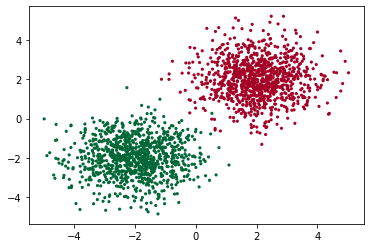

In [41]:
num_inputs = 2
n_data = torch.ones(1000, num_inputs)
x1 = torch.normal(2 * n_data, 1)
y1 = torch.zeros(1000)
x2 = torch.normal(-2 * n_data, 1)
y2 = torch.ones(1000)

x = torch.cat((x1, x2), 0).type(torch.FloatTensor)
y = torch.cat((y1, y2), 0).type(torch.FloatTensor)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=10, lw=0, cmap='RdYlGn')
plt.show()

## 手动从0实现 logistic 回归

读取数据

In [42]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    np.random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j=torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)

模型参数初始化，本实验将权重初始化成均值为0、标准差为0.01的正态随机数，偏置初始化为0。

In [43]:
w=torch.tensor(np.random.normal(0,0.01,(2,1)),dtype=torch.float32)
b=torch.zeros(1,dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

构建logistic回归模型

In [44]:
def logitic(X, w, b):
    y_hat = torch.mm(X, w) + b
    return 1/(1+torch.pow(np.e,-y_hat))

实现二元交叉熵损失函数和小批量随机梯度下降算法优化函数

In [45]:
def BCE_loss(y_hat, y):
    y = y.view(y_hat.size())  #将标签的格式修改成预测的形状
    return  -y.mul(torch.log(y_hat))-(1-y).mul(torch.log(1-y_hat))

def sgd(params, lr, batch_size):  
    for param in params:  
        param.data -= lr * param.grad / batch_size

训练过程

In [46]:
lr = 0.001
num_epochs = 300
n = 2000
batch_size = 50
net = logitic
loss = BCE_loss
features = x
labels = y
train_acc= []
train_loss = []

for epoch in range(num_epochs):
    train_loss_sum, train_acc_sum = 0.0,0.0
    for X, y in data_iter(batch_size, features, labels):
        y_hat = net(X, w, b)
        loss_batch = loss(y_hat, y).sum()
        loss_batch.backward()
        sgd([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_() 
        #item取出单元素张量的元素值并返回该值，保持原元素类型不变,所以在求loss,以及accuracy rate的时候一般用item()
        train_loss_sum += loss_batch.item()
        for i in range(batch_size):
            if y_hat[i] > 0.5:
                y_hat[i] = torch.tensor(1.0)
            else:
                y_hat[i] = torch.tensor(0.0)
        for i in range(batch_size):
            if y_hat[i] == y[i]:
                train_acc_sum += 1 
    train_acc.append(train_acc_sum/n)
    train_loss.append(train_loss_sum/n)
    print('epoch %d, loss %.4f, train acc %.3f'
          % (epoch + 1, train_loss[epoch], train_acc[epoch]))

epoch 1, loss 0.6561, train acc 0.981
epoch 2, loss 0.5885, train acc 0.999
epoch 3, loss 0.5319, train acc 1.000
epoch 4, loss 0.4842, train acc 1.000
epoch 5, loss 0.4438, train acc 1.000
epoch 6, loss 0.4093, train acc 1.000
epoch 7, loss 0.3797, train acc 1.000
epoch 8, loss 0.3540, train acc 1.000
epoch 9, loss 0.3315, train acc 1.000
epoch 10, loss 0.3118, train acc 1.000
epoch 11, loss 0.2943, train acc 1.000
epoch 12, loss 0.2788, train acc 1.000
epoch 13, loss 0.2649, train acc 1.000
epoch 14, loss 0.2524, train acc 1.000
epoch 15, loss 0.2411, train acc 1.000
epoch 16, loss 0.2308, train acc 1.000
epoch 17, loss 0.2215, train acc 1.000
epoch 18, loss 0.2129, train acc 1.000
epoch 19, loss 0.2050, train acc 1.000
epoch 20, loss 0.1978, train acc 1.000
epoch 21, loss 0.1911, train acc 1.000
epoch 22, loss 0.1848, train acc 1.000
epoch 23, loss 0.1791, train acc 1.000
epoch 24, loss 0.1737, train acc 1.000
epoch 25, loss 0.1686, train acc 1.000
epoch 26, loss 0.1639, train acc 1

定义画图函数，用于绘制loss图像和acc图像

In [21]:
def Draw_Curve(*args,xlabel = "epoch",ylabel = "value"):
    for i in args:
        x = np.linspace(0,len(i[0]),len(i[0]))  
        plt.plot(x,i[0],label=i[1],linewidth=1.5)  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

将训练数据的特征和标签组合，把dataset放入DataLoader  

In [47]:
dataset = Data.TensorDataset(features, labels)  
train_data_iter = Data.DataLoader(dataset=dataset, # torch TensorDataset format  
                            batch_size=batch_size, # mini batch size  
                            shuffle=True, # 是否打乱数据 (训练集一般需要进行打乱)  
                            num_workers=0, # 多线程来读数据， 注意在Windows下需要设置为0  
                           )  

利用nn.Module构建模型，初始化参数，定义损失函数和优化器

In [48]:
class Logistic(nn.Module):  
    def __init__(self,n_features):  
        super(Logistic, self).__init__()  
        self.lr = nn.Linear(n_features, 1)  
        self.sm = nn.Sigmoid()  
    
    def forward(self, x): 
        x = self.lr(x)  
        x = self.sm(x)  
        return x  
logistic_model = Logistic(num_inputs) 
criterion = nn.BCELoss()  
optimizer = torch.optim.SGD(logistic_model.parameters(), lr=1e-3)  
nn.init.normal_(logistic_model.lr.weight, mean=0, std=0.01)  
nn.init.constant_(logistic_model.lr.bias, val=0)
print(logistic_model.lr.weight)  
print(logistic_model.lr.bias)  

Parameter containing:
tensor([[-0.0016, -0.0113]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


训练过程

In [49]:
num_epochs = 300 
train_acc_nn = []
train_loss_nn =[] 
for epoch in range( num_epochs):  
    train_l_sum, train_acc_sum,n = 0.0,0.0,0  
    for X, y in train_data_iter:  
        y_hat = logistic_model(X)  
        l = criterion(y_hat, y.view(-1, 1))  
        optimizer.zero_grad() # 梯度清零，等价于logistic_model.zero_grad()  
        l.backward()  
        optimizer.step()  
        train_l_sum += l.item()  
        y_hat = torch.squeeze(torch.where(y_hat>0.5,torch.tensor(1.0),torch.tensor(0.0)))  
        train_acc_sum += (y_hat==y).sum().item()  
        n+= y.shape[0]  
    train_acc_nn.append(train_acc_sum/n)
    train_loss_nn.append(train_l_sum/n)
    print('epoch %d, loss %.4f, train acc %.3f'
          % (epoch + 1, train_loss_nn[epoch], train_acc_nn[epoch]))

epoch 1, loss 0.0129, train acc 0.996
epoch 2, loss 0.0116, train acc 0.999
epoch 3, loss 0.0105, train acc 0.999
epoch 4, loss 0.0095, train acc 0.999
epoch 5, loss 0.0088, train acc 1.000
epoch 6, loss 0.0081, train acc 1.000
epoch 7, loss 0.0075, train acc 1.000
epoch 8, loss 0.0070, train acc 1.000
epoch 9, loss 0.0066, train acc 1.000
epoch 10, loss 0.0062, train acc 1.000
epoch 11, loss 0.0058, train acc 1.000
epoch 12, loss 0.0055, train acc 1.000
epoch 13, loss 0.0053, train acc 1.000
epoch 14, loss 0.0050, train acc 1.000
epoch 15, loss 0.0048, train acc 1.000
epoch 16, loss 0.0046, train acc 1.000
epoch 17, loss 0.0044, train acc 1.000
epoch 18, loss 0.0042, train acc 1.000
epoch 19, loss 0.0041, train acc 1.000
epoch 20, loss 0.0039, train acc 1.000
epoch 21, loss 0.0038, train acc 1.000
epoch 22, loss 0.0037, train acc 1.000
epoch 23, loss 0.0036, train acc 1.000
epoch 24, loss 0.0035, train acc 1.000
epoch 25, loss 0.0034, train acc 1.000
epoch 26, loss 0.0033, train acc 1

绘制loss函数和acc函数

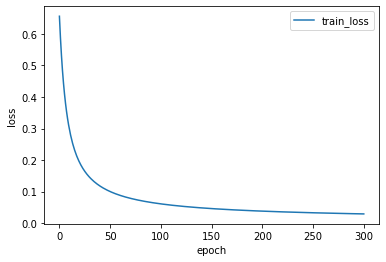

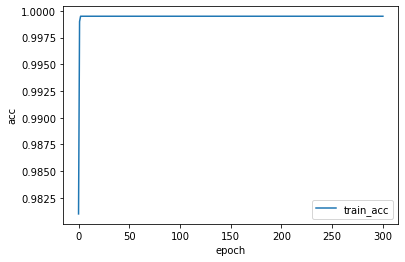

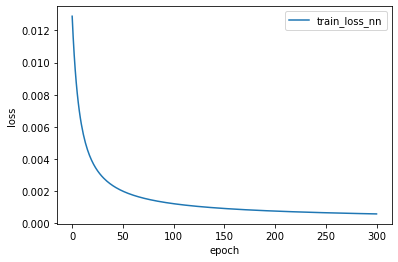

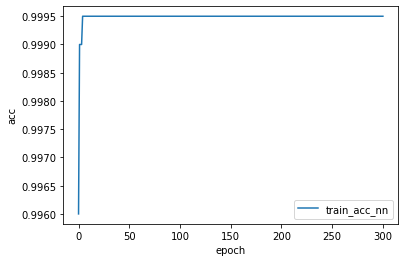

In [50]:
Draw_Curve([train_loss,"train_loss"],ylabel = "loss")
Draw_Curve([train_acc,"train_acc"],ylabel = "acc")
Draw_Curve([train_loss_nn,"train_loss_nn"],ylabel = "loss")
Draw_Curve([train_acc_nn,"train_acc_nn"],ylabel = "acc")

# 实现softmax

使用dataloader加载数据

In [51]:
mnist_train = torchvision.datasets.FashionMNIST(root="F:/postgraduate-study/deep Learning-wan/data/first", train=True, download=False, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root="F:/postgraduate-study/deep Learning-wan/data/first", train=False, download=False, transform=transforms.ToTensor())
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=0)

## 从0实现 softmax 回归

初始化模型参数

In [52]:
import numpy as np
num_inputs = 28 * 28
num_outputs = 10

W = torch.tensor(np.random.normal(0,0.01,(num_inputs,num_outputs)),dtype=torch.float)
b = torch.zeros(num_outputs,dtype=torch.float)
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

构建模型

In [53]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition

def net(X):
    return softmax(torch.mm(X.view((-1,num_inputs)),W)+b)

定义交叉熵损失函数和优化函数

In [54]:
def cross_entropy(y_hat,y):
    return - torch.log(y_hat.gather(1,y.view(-1,1)))
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

计算acc函数

In [55]:
def evaluate_accuracy(data_iter,net):
    acc_sum,n,test_l_sum= 0.0,0,0.0
    for X,y in data_iter:
        acc_sum += (net(X).argmax(dim = 1) == y).float().sum().item()
        l = loss(net(X),y).sum()
        test_l_sum += l.item()
        n += y.shape[0]
    return acc_sum/n,test_l_sum/n

训练过程

In [56]:
num_epochs = 100
lr = 0.01
test_acc,train_acc= [],[]
train_loss,test_loss =[],[] 
loss  = cross_entropy
params  = [W,b]
for epoch in range(num_epochs):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X,y in train_iter:
        y_hat = net(X)
        l = loss(y_hat,y).sum()
        l.backward()
        sgd(params, lr, batch_size)
        W.grad.data.zero_()
        b.grad.data.zero_()
        train_l_sum += l.item()
        train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]
    test_a,test_l = evaluate_accuracy(test_iter, net)
    test_acc.append(test_a)
    test_loss.append(test_l)
    train_acc.append(train_acc_sum/n)
    train_loss.append(train_l_sum/n)
    print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
          % (epoch + 1, train_loss[epoch], train_acc[epoch], test_acc[epoch]))


epoch 1, loss 1.3602, train acc 0.643, test acc 0.682
epoch 2, loss 0.9162, train acc 0.717, test acc 0.722
epoch 3, loss 0.8034, train acc 0.750, test acc 0.746
epoch 4, loss 0.7432, train acc 0.767, test acc 0.759
epoch 5, loss 0.7036, train acc 0.779, test acc 0.771
epoch 6, loss 0.6749, train acc 0.788, test acc 0.778
epoch 7, loss 0.6525, train acc 0.795, test acc 0.784
epoch 8, loss 0.6345, train acc 0.799, test acc 0.787
epoch 9, loss 0.6197, train acc 0.803, test acc 0.792
epoch 10, loss 0.6070, train acc 0.806, test acc 0.797
epoch 11, loss 0.5962, train acc 0.809, test acc 0.799
epoch 12, loss 0.5866, train acc 0.812, test acc 0.801
epoch 13, loss 0.5780, train acc 0.814, test acc 0.805
epoch 14, loss 0.5705, train acc 0.817, test acc 0.805
epoch 15, loss 0.5637, train acc 0.818, test acc 0.808
epoch 16, loss 0.5576, train acc 0.820, test acc 0.808
epoch 17, loss 0.5520, train acc 0.821, test acc 0.811
epoch 18, loss 0.5468, train acc 0.822, test acc 0.810
epoch 19, loss 0.54

## 利用torch.nn实现 softmax 回归

构建模型

In [57]:
class softmaxnet(torch.nn.Module):
    def __init__(self, n_features, n_labels):
        super(softmaxnet, self).__init__()
        self.linear = torch.nn.Linear(n_features, n_labels)

    def forward(self, x):
        x_ = x.view((-1, num_inputs))
        y_hat = self.linear(x_)
        return y_hat
net = softmaxnet(num_inputs, num_outputs)

初始化参数,定义损失函数和优化函数

In [58]:
nn.init.normal_(net.linear.weight, mean=0, std=0.01)  
nn.init.constant_(net.linear.bias, val=0) #也可以直接修改bias的data： net[0].bias.data.fill_(0)  
print(net.linear.weight)  
print(net.linear.bias)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(),lr = 0.005)

Parameter containing:
tensor([[-1.4633e-02,  1.1763e-02,  1.2063e-02,  ..., -8.8989e-03,
         -3.3527e-03,  9.1619e-04],
        [-6.8643e-03, -1.0391e-02, -8.7322e-04,  ...,  3.3743e-03,
          3.2603e-03, -9.1506e-03],
        [ 5.0523e-03, -2.5719e-03, -3.8446e-04,  ...,  2.4095e-03,
         -3.9648e-03, -1.6499e-02],
        ...,
        [-5.9679e-03,  7.7812e-06, -3.1700e-03,  ...,  1.7495e-02,
          5.2439e-03,  6.7462e-03],
        [ 1.2518e-02,  4.0740e-03, -9.5051e-03,  ...,  9.2311e-03,
          9.3971e-03,  5.1680e-03],
        [-1.8379e-04,  1.6663e-02,  3.7217e-03,  ..., -2.1886e-02,
         -9.5560e-03,  5.7000e-03]], requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


训练过程

In [59]:
num_epochs = 100
test_acc_nn,train_acc_nn = [],[]
train_loss_nn,test_loss_nn =[],[] 
for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X,y in train_iter:
            y_hat = net(X)
            l = loss(y_hat,y).sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
            
        test_a,test_l = evaluate_accuracy(test_iter, net)
        test_acc_nn.append(test_a)
        test_loss_nn.append(test_l)
        train_acc_nn.append(train_acc_sum/n)
        train_loss_nn.append(train_l_sum/n)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_loss_nn[epoch], train_acc_nn[epoch], test_acc_nn[epoch]))

epoch 1, loss 0.0063, train acc 0.610, test acc 0.652
epoch 2, loss 0.0044, train acc 0.679, test acc 0.678
epoch 3, loss 0.0038, train acc 0.703, test acc 0.704
epoch 4, loss 0.0034, train acc 0.727, test acc 0.724
epoch 5, loss 0.0032, train acc 0.744, test acc 0.735
epoch 6, loss 0.0031, train acc 0.756, test acc 0.747
epoch 7, loss 0.0030, train acc 0.765, test acc 0.755
epoch 8, loss 0.0029, train acc 0.772, test acc 0.762
epoch 9, loss 0.0028, train acc 0.778, test acc 0.765
epoch 10, loss 0.0027, train acc 0.783, test acc 0.768
epoch 11, loss 0.0027, train acc 0.787, test acc 0.772
epoch 12, loss 0.0026, train acc 0.791, test acc 0.776
epoch 13, loss 0.0026, train acc 0.794, test acc 0.781
epoch 14, loss 0.0025, train acc 0.797, test acc 0.785
epoch 15, loss 0.0025, train acc 0.799, test acc 0.786
epoch 16, loss 0.0025, train acc 0.801, test acc 0.789
epoch 17, loss 0.0024, train acc 0.803, test acc 0.790
epoch 18, loss 0.0024, train acc 0.805, test acc 0.793
epoch 19, loss 0.00

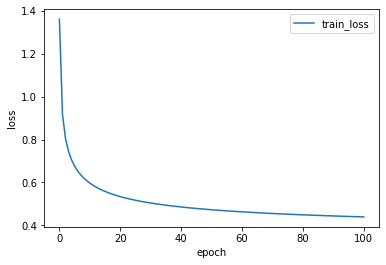

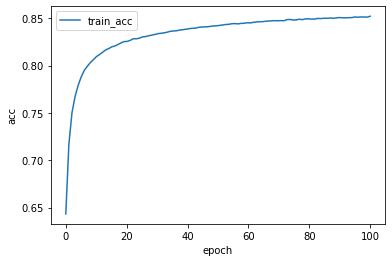

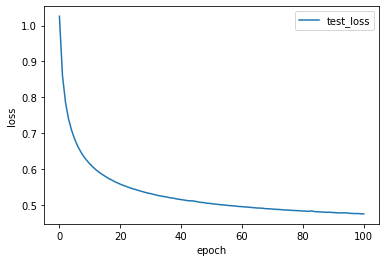

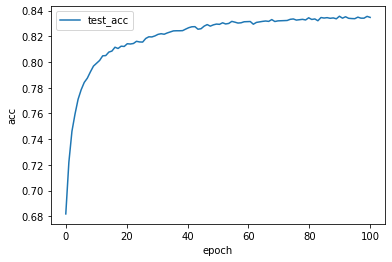

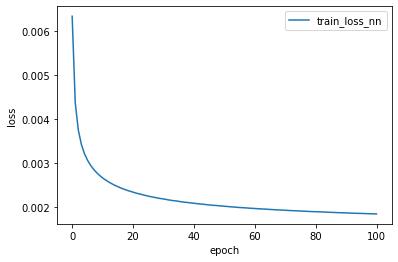

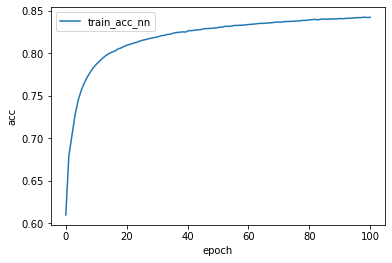

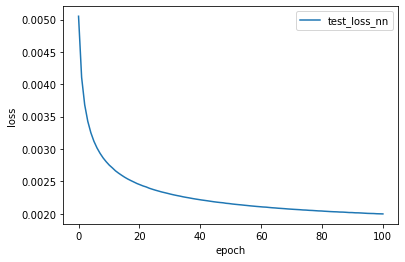

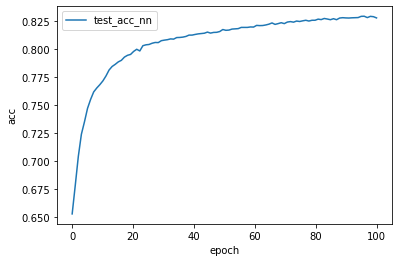

In [60]:
Draw_Curve([train_loss,"train_loss"],ylabel = "loss")
Draw_Curve([train_acc,"train_acc"],ylabel = "acc")
Draw_Curve([test_loss,"test_loss"],ylabel = "loss")
Draw_Curve([test_acc,"test_acc"],ylabel = "acc")
Draw_Curve([train_loss_nn,"train_loss_nn"],ylabel = "loss")
Draw_Curve([train_acc_nn,"train_acc_nn"],ylabel = "acc")
Draw_Curve([test_loss_nn,"test_loss_nn"],ylabel = "loss")
Draw_Curve([test_acc_nn,"test_acc_nn"],ylabel = "acc")